## Assignment 3 for HW 2
#### Author Sofiya Elyukin

##### Used code from Sebastian's notebook, as well as examples in Lab2 and UInotebooks to put this together. Two sections of code were provided by Prof. Bianco during Thursday's extended office hours.

In [1]:
from __future__ import print_function
import os
import pandas as pd
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Get environmental variable
DFDATA = os.getenv('DFDATA')
print (DFDATA)

/gws/open/NYCOpenData/nycopendata/data


In [3]:
# Get data from CUSP data facility as CSV file and preview. Data is New York City Council Discretionary Funding (2009-2013)
df = pd.read_csv(DFDATA + '/m3fi-rt3k/1414246152/m3fi-rt3k')
# df.describe() to see how many rows
df.head(10)

,Fiscal Year,Source,Council Member,Legal Name,EIN,Status,Amount,Agency,Program Name,Street Address 1,Street Address 2,Zip Code,Purpose of Funds,Fiscal Conduit Name,FC EIN,Location 1
0,2009,Local,Oddo,122nd Police Precinct,13-6400434,Cleared,$55000.00,NYPD,NaN,2320 Hylan Boulevard,NaN,10306,To purchase an undercover surveillance van.,NaN,NaN,"2320 Hylan Boulevard\nStaten Island, NY 10306\..."
1,2009,Local,Fidler,A. Genovesi Environmental Center,13-6400434,Cleared,$45000.00,DOE,NaN,7151 Avenue T,NaN,11234,Funds will support Environmental Center and Ec...,Community District 22/Region 6,13-6499434,"7151 Avenue T\nBrooklyn, NY 11234\n(40.6215933..."
2,2009,Local,Recchia,A. Genovesi Environmental Center,13-6400434,Cleared,$25000.00,DOE,NaN,7151 Avenue T,NaN,11234,Funds will provide support for Environmental C...,Community District 22/Region 6,13-6499434,"7151 Avenue T\nBrooklyn, NY 11234\n(40.6215933..."
3,2009,Aging,Dickens,A. Philip Randolph Houses Tenant Association,13-6400434,Cleared,$3500.00,DFTA,NaN,253 West 114th Street,NaN,10026,Increased senior-based services for residents ...,NaN,NaN,"253 West 114th Street\nNew York, NY 10026\n(40..."
4,2009,Local,James,Acorn Community High School,69-0210637,Cleared,$5000.00,DOE,NaN,561 Grand Avenue,NaN,11238,To infuse technology as a way of teaching stud...,NaN,NaN,"561 Grand Avenue\nBrooklyn, NY 11238\n(40.6785..."
5,2009,Local,Yassky,Automotive High School,13-6400434,Cleared,$10000.00,DOE,Automotive Trades HS (610),50 Bedford Avenue,NaN,11222,To provide funding for after-school programs.,NaN,NaN,"50 Bedford Avenue\nBrooklyn, NY 11222\n(40.723..."
6,2009,Local,CC,Baruch College/Research Foundation,23-7039817,Cleared,$90000.00,CUNY,NaN,1 Bernard Baruch Way,NaN,10010,to enhance the ability of Baruch College to pr...,NaN,NaN,"1 Bernard Baruch Way\nNew York, NY 10010\n(40...."
7,2009,Youth,"Addabbo, Jr",Beach Channel High School,13-6400434,Cleared,$3500.00,DYCD,Crew Team,100-00 Beach Channel Drive,NaN,11694,To support local high school crew team.,"Graybeards, Ltd.",11-3635931,"100-00 Beach Channel Drive\nRockaway Park, NY ..."
8,2009,Black Male Empowerment Initiative,NaN,Black Male Empowerment Initiative,13-6400434,Cleared,$2500000.00,CUNY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2009,Local,CC,Borough of Manhattan Community College,13-3224400,Cleared,$225000.00,CUNY,NaN,199 Chambers Street,NaN,10007,tribeca film festival,NaN,NaN,"199 Chambers Street\nNew York, NY 10007\n(40.7..."


In [4]:
# Test dropping columns and removing NaN values because ZIP/Amount (6 and 11) may not have NaN values, but Program Name(8) does
# From Sebastian's code, instead of specifying every column to drop, select only the columns to keep for a new dataframe
test = df[[6, 8, 11]].dropna()
test.head(4)

,Amount,Program Name,Zip Code
5,$10000.00,Automotive Trades HS (610),11222
7,$3500.00,Crew Team,11694
36,$10000.00,Borough as Classroom,11210
62,$5000.00,"Center for Law and Social Justice, Medgar Ever...",11225


In [5]:
# Keep only two numerical columns and drop NaN (but both columns are strings for now)
data = df[[6, 11]].dropna()
data.head(4)

,Amount,Zip Code
0,$55000.00,10306
1,$45000.00,11234
2,$25000.00,11234
3,$3500.00,10026


In [6]:
# From office hours - drop '$' from 'Amount' column and convert to float (not part of table yet)
data['Amount '].map(lambda x: x.replace('$', '')).astype('float')

0          55000.0
1          45000.0
2          25000.0
3           3500.0
4           5000.0
5          10000.0
6          90000.0
7           3500.0
9         225000.0
15          2300.0
16         13500.0
22          4067.0
23         10000.0
24          4060.0
25          3500.0
27          4060.0
28          8000.0
35         75000.0
36         10000.0
38          2000.0
39         10000.0
40          2000.0
41         10000.0
42          3000.0
43          3500.0
44         10000.0
59         10000.0
60       4413000.0
61          5000.0
62          5000.0
           ...    
17457       3500.0
17458       5000.0
17459       5000.0
17460       3500.0
17461       3500.0
17462       4500.0
17463       3500.0
17464       3500.0
17465       5000.0
17466       5000.0
17467       5000.0
17468      10000.0
17469       4000.0
17470       5000.0
17471       4500.0
17472       7000.0
17473       5000.0
17474       3000.0
17475       5000.0
17476       3000.0
17477       5000.0
17478      1

In [7]:
# Create new column for 'Amount' and populate it using the function from the previous step
data['AmountFloat'] = data['Amount '].map(lambda x: x.replace('$', '')).astype('float')
data.head(4)

,Amount,Zip Code,AmountFloat
0,$55000.00,10306,55000.0
1,$45000.00,11234,45000.0
2,$25000.00,11234,25000.0
3,$3500.00,10026,3500.0


In [8]:
# Drop string version of 'Amount' from table
data.drop(data.columns[0], axis=1, inplace=True)
data.head(4)

,Zip Code,AmountFloat
0,10306,55000.0
1,11234,45000.0
2,11234,25000.0
3,10026,3500.0


In [9]:
#print (data['Zip Code '].values)

In [10]:
# from Thursday office hours
def convert_zip(zipcstr):
    '''converts zip to float and returns NaN if that fails (at least one value was Zip+4, and another was a name)
    '''
    try: 
        return float(zipcstr.split('-')[0]) #splits any zip+4 and only keeps zip
    except ValueError:
        return np.nan

# Create new column for Zip and populates it with the values from the above function
data['Zip_Code_Float'] = data['Zip Code '].map(convert_zip)
print (type(data['Zip_Code_Float'][0]))
data.head(4)

<type 'numpy.float64'>


,Zip Code,AmountFloat,Zip_Code_Float
0,10306,55000.0,10306.0
1,11234,45000.0,11234.0
2,11234,25000.0,11234.0
3,10026,3500.0,10026.0


In [11]:
# Drop string versions of 'Amount' and 'Zip Code' from table
data.drop(data.columns[0], axis=1, inplace=True)
data.head(4)

,AmountFloat,Zip_Code_Float
0,55000.0,10306.0
1,45000.0,11234.0
2,25000.0,11234.0
3,3500.0,10026.0


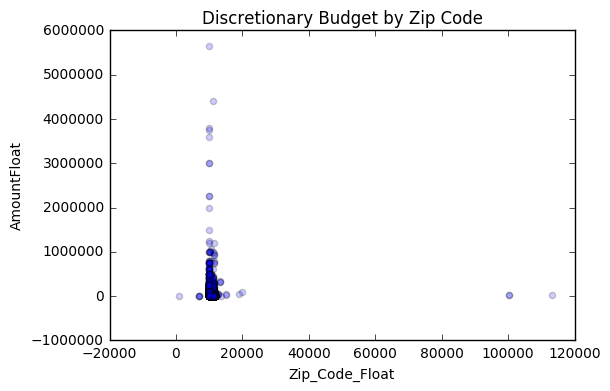

In [12]:
# Plot dataframe (from UInotebooks/.../ReadingData)
AmountZip = data.plot(y='AmountFloat', x='Zip_Code_Float', kind='scatter', alpha = .2)
AmountZip.set_title("Discretionary Budget by Zip Code")

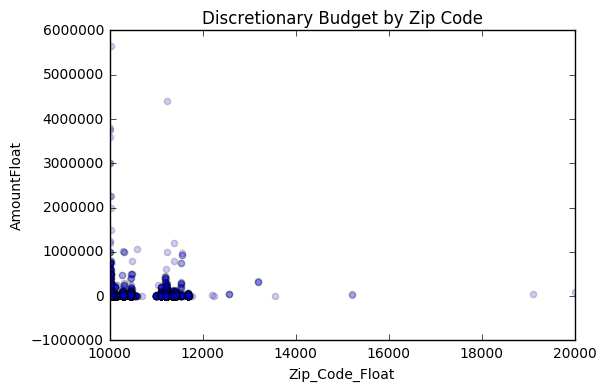

In [13]:
# Adjusting axis because zip shouldn't be 6 digits, got 'xlim' and 'ylim' 
# from http://stackoverflow.com/questions/2849286/python-matplotlib-subplot-how-to-set-the-axis-range
AmountZip = data.plot(y='AmountFloat', x='Zip_Code_Float', kind='scatter', alpha = .2, xlim = ([10000, 20000]))
AmountZip.set_title("Discretionary Budget by Zip Code")